In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading in the two datasets regarding sentiment

In [80]:
df1 = pd.read_parquet('Sentiment_data.parquet')

df1.head()

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text,sentiment
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.00,I bring to all warm \ngreetings and the good w...,0.9999
2,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2014,12.0,4.0,62.93,0.29,It gives me \ngreat pleasure to express my sin...,0.9996
3,Europe,Northern Europe,NOR,Norway,WE/EU,7.0,2022,84.0,7.0,92.00,-1.28,We live in challenging times indeed. As a glob...,0.9992
5,Asia,Southern Asia,AFG,Afghanistan,AP,4.0,2015,11.0,4.0,62.56,-0.37,"It gives me great pleasure, on behalf of the I...",0.9993
7,Asia,Southern Asia,AFG,Afghanistan,AP,5.0,2016,15.0,5.0,62.25,-0.31,It is my distinct pleasure to attend the seven...,0.9998


In [59]:
df2 = pd.read_parquet('Sentiment_data_per_paragraph.parquet')

df2.head()

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text_split,sentiment
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.0,Afghanistan. I therefore think that it is usef...,0.9803
1,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.0,I should like to share two contrasting picture...,0.5267
2,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.0,"States-led international military coalition, t...",-0.9716
3,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.0,Exploiting the vacuum and internal strife crea...,-0.9595
4,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.0,Taliban regime until the 9/11 terrorist attack...,-0.8225


In [77]:
df3 = df2.groupby('country_name')
df3.head()

,Region Name,Sub-region Name,iso_3,country_name,Region,corruption_sources,year,corruption_scores,corruption_standard_errors,global_score,fos_yearly_evolution,text_split,sentiment
0,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.0,Afghanistan. I therefore think that it is usef...,0.9803
1,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.0,I should like to share two contrasting picture...,0.5267
2,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.0,"States-led international military coalition, t...",-0.9716
3,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.0,Exploiting the vacuum and internal strife crea...,-0.9595
4,Asia,Southern Asia,AFG,Afghanistan,AP,3.0,2013,8.0,3.0,62.64,0.0,Taliban regime until the 9/11 terrorist attack...,-0.8225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41150,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,8.0,2013,38.0,8.0,72.07,0.0,President of the General Assembly at its sixty...,0.9337
41151,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,8.0,2013,38.0,8.0,72.07,0.0,President of our delegation’s support as he di...,0.9842
41152,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,8.0,2013,38.0,8.0,72.07,0.0,"MDGs, and Governments will have an opportunity...",0.9300
41153,Africa,Sub-Saharan Africa,ZMB,Zambia,SSA,8.0,2013,38.0,8.0,72.07,0.0,"The challenges are still immense, and we have ...",0.8860


## 2. Exploring the data: "To what extent can the press freedom score of a country say something about the sentiment of speeches during the UN General Debate?"

In this part we will perform exploratory analysis based on our exploratory research question as states above. 

First we will examine the correlations between the level of sentiment over the years and the corruption scores / global scores. 

### 2.1. Sentiment & Corruption

Lets see the correlations between sentiment score and corruption score when we use DF2:

In [61]:
# Group by country_name and year, calculate mean sentiment score
grouped_sentiment_data = df2.groupby(['country_name', 'year'])['sentiment'].mean().reset_index()

# DataFrame with mean sentiment score for each country and year
grouped_sentiment_data.head()

,country_name,year,sentiment
0,Afghanistan,2013,0.433078
1,Afghanistan,2014,0.303645
2,Afghanistan,2015,0.200063
3,Afghanistan,2016,0.280916
4,Afghanistan,2017,0.030567


In [62]:
# Group by country_name and year, calculate mean corruption score
grouped_corruption_data = df2.groupby(['country_name', 'year'])['corruption_scores'].mean().reset_index()

# DataFrame with mean corruption score for each country and year
grouped_corruption_data.head()

,country_name,year,corruption_scores
0,Afghanistan,2013,8.0
1,Afghanistan,2014,12.0
2,Afghanistan,2015,11.0
3,Afghanistan,2016,15.0
4,Afghanistan,2017,15.0


In [63]:
# Merge DataFrames on 'country_name' and 'year'
merged_df = pd.merge(grouped_sentiment_data, grouped_corruption_data, on=['country_name', 'year'])
merged_df.head()

,country_name,year,sentiment,corruption_scores
0,Afghanistan,2013,0.433078,8.0
1,Afghanistan,2014,0.303645,12.0
2,Afghanistan,2015,0.200063,11.0
3,Afghanistan,2016,0.280916,15.0
4,Afghanistan,2017,0.030567,15.0


Now lets see the correlations when we use DF1:

In [64]:
# Calculate overall correlation
correlation = merged_df['sentiment'].corr(merged_df['corruption_scores'])
correlation

-0.038598616430599676

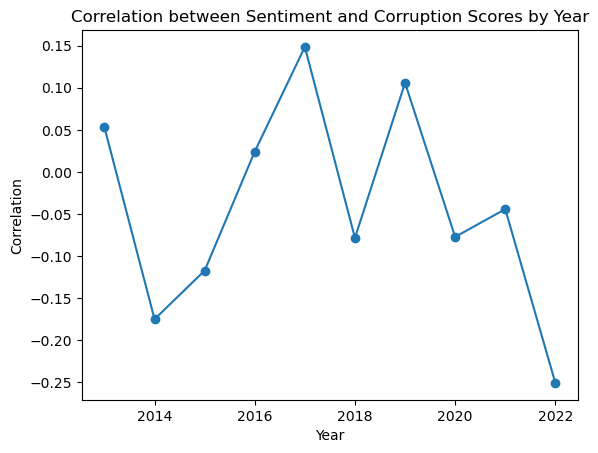

In [65]:
# Calculate correlation for each year
correlations_by_year = merged_df.groupby('year')[['sentiment', 'corruption_scores']].corr().iloc[0::2,-1].reset_index()
correlations_by_year.rename(columns={'corruption_scores': 'correlation'}, inplace=True)

# Plotting
plt.plot(correlations_by_year['year'], correlations_by_year['correlation'], marker='o')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation between Sentiment and Corruption Scores by Year')
plt.show()

In [66]:
# Print the correlation values for each year
print("Correlation between Sentiment and Corruption Scores by Year:")
print(correlations_by_year)

Correlation between Sentiment and Corruption Scores by Year:
   year    level_1  correlation
0  2013  sentiment     0.052919
1  2014  sentiment    -0.174937
2  2015  sentiment    -0.117193
3  2016  sentiment     0.024189
4  2017  sentiment     0.148482
5  2018  sentiment    -0.078342
6  2019  sentiment     0.105828
7  2020  sentiment    -0.077216
8  2021  sentiment    -0.044192
9  2022  sentiment    -0.250632


### 2.2. Sentiment & Global FOP Scores

In [67]:
# DataFrame with mean sentiment score for each country and year
grouped_sentiment_data.head()

,country_name,year,sentiment
0,Afghanistan,2013,0.433078
1,Afghanistan,2014,0.303645
2,Afghanistan,2015,0.200063
3,Afghanistan,2016,0.280916
4,Afghanistan,2017,0.030567


In [68]:
# Group by country_name and year, calculate mean FOP score
grouped_FOP_data = df2.groupby(['country_name', 'year'])['global_score'].mean().reset_index()

# DataFrame with mean corruption score for each country and year
grouped_FOP_data.head()

,country_name,year,global_score
0,Afghanistan,2013,62.64
1,Afghanistan,2014,62.93
2,Afghanistan,2015,62.56
3,Afghanistan,2016,62.25
4,Afghanistan,2017,60.54


In [72]:
# Merge DataFrames on 'country_name' and 'year'
merged_df2 = pd.merge(grouped_sentiment_data, grouped_FOP_data, on=['country_name', 'year'])
merged_df2.head()

,country_name,year,sentiment,global_score
0,Afghanistan,2013,0.433078,62.64
1,Afghanistan,2014,0.303645,62.93
2,Afghanistan,2015,0.200063,62.56
3,Afghanistan,2016,0.280916,62.25
4,Afghanistan,2017,0.030567,60.54


In [73]:
# Calculate correlation
correlation = merged_df2['sentiment'].corr(merged_df2['global_score'])
correlation

0.0339289171612987

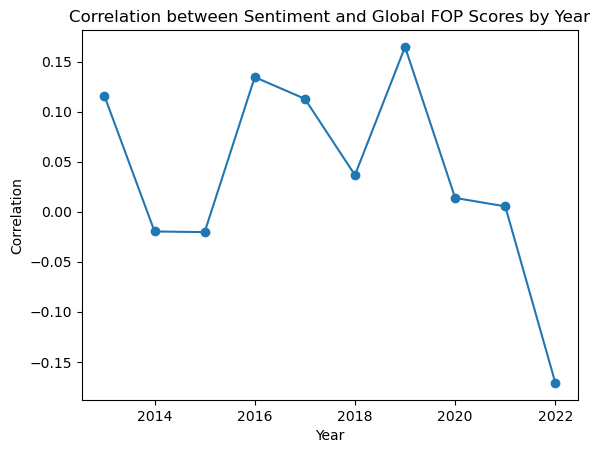

In [74]:
# Calculate correlation for each year
correlations_by_year2 = merged_df2.groupby('year')[['sentiment', 'global_score']].corr().iloc[0::2,-1].reset_index()
correlations_by_year2.rename(columns={'global_score': 'correlation'}, inplace=True)

# Plotting
plt.plot(correlations_by_year2['year'], correlations_by_year2['correlation'], marker='o')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation between Sentiment and Global FOP Scores by Year')
plt.show()

In [78]:
# Print the correlation values for each year
print("Correlation between Sentiment and Global FOP Scores by Year:")
print(correlations_by_year2)

Correlation between Sentiment and Global FOP Scores by Year:
   year    level_1  correlation
0  2013  sentiment     0.115643
1  2014  sentiment    -0.019771
2  2015  sentiment    -0.020396
3  2016  sentiment     0.134437
4  2017  sentiment     0.112770
5  2018  sentiment     0.036572
6  2019  sentiment     0.164622
7  2020  sentiment     0.013751
8  2021  sentiment     0.005306
9  2022  sentiment    -0.171102


### Interpreting the Data 

As we can observe from the outputs above, the overall correlation between the sentiment score and the global FOP score seems to be positive, indicating some kind of positive relationship (if the sentiment score rises over the years, then the FOP score does so as well). However, this correlation is 0.034, which is still very low. If we can say anything about the relationship with this score is hence uncertain. Perhaps more exploratory analysis is required to study the relationship between these variables. 

However, if we see the development of the correlations over the years, we definetely can see variations. For instance, in the year 2022, the sentiment score and corruption score have a negative correlation of -0.25, and in 2019, the sentiment and Global FOP score had a positive correlation of 0.16. Why could this be the case? 